In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import json
import requests
from pprint import pprint
import geopandas
import fiona

In [ ]:
# Demographic data files not used in presentation

dem_housing_info_2021_path = "../resources/dem_housing_info_2021.csv"
dem_housing_info_2020_path = "../resources/dem_housing_info_2020.csv"
dem_housing_info_2019_path = "../resources/dem_housing_info_2019.csv"
dem_housing_info_2018_path = "../resources/dem_housing_info_2018.csv"
dem_housing_info_2017_path = "../resources/dem_housing_info_2017.csv"
dem_housing_info_2016_path = "../resources/dem_housing_info_2016.csv"
dem_housing_info_2015_path = "../resources/dem_housing_info_2015.csv"

# Read the data 
dem_housing_info_2021=pd.read_csv(dem_housing_info_2021_path)
dem_housing_info_2020=pd.read_csv(dem_housing_info_2020_path)
dem_housing_info_2019=pd.read_csv(dem_housing_info_2019_path)
dem_housing_info_2018=pd.read_csv(dem_housing_info_2018_path)
dem_housing_info_2017=pd.read_csv(dem_housing_info_2017_path)
dem_housing_info_2016=pd.read_csv(dem_housing_info_2016_path)
dem_housing_info_2015=pd.read_csv(dem_housing_info_2015_path)

# Create DataFrame
demographics_2021_df=pd.DataFrame(dem_housing_info_2021)
demographics_2020_df=pd.DataFrame(dem_housing_info_2020)
demographics_2019_df=pd.DataFrame(dem_housing_info_2019)
demographics_2018_df=pd.DataFrame(dem_housing_info_2018)
demographics_2017_df=pd.DataFrame(dem_housing_info_2017)
demographics_2016_df=pd.DataFrame(dem_housing_info_2016)
demographics_2015_df=pd.DataFrame(dem_housing_info_2015)




In [2]:
# Study financial data files
financials_by_zip_2021_path="../resources/financials_by_zip_2021.csv"
financials_by_zip_2020_path="../resources/financials_by_zip_2020.csv"
financials_by_zip_2019_path="../resources/financials_by_zip_2019.csv"
financials_by_zip_2018_path="../resources/financials_by_zip_2018.csv"
financials_by_zip_2017_path="../resources/financials_by_zip_2017.csv"
financials_by_zip_2016_path="../resources/financials_by_zip_2016.csv"
financials_by_zip_2015_path="../resources/financials_by_zip_2015.csv"

# Read the data
financials_by_zip_2021=pd.read_csv(financials_by_zip_2021_path)
financials_by_zip_2020=pd.read_csv(financials_by_zip_2020_path)
financials_by_zip_2019=pd.read_csv(financials_by_zip_2019_path)
financials_by_zip_2018=pd.read_csv(financials_by_zip_2018_path)
financials_by_zip_2017=pd.read_csv(financials_by_zip_2017_path)
financials_by_zip_2016=pd.read_csv(financials_by_zip_2016_path)
financials_by_zip_2015=pd.read_csv(financials_by_zip_2015_path)

# Create DataFrame
financials_by_zip_2021_df=pd.DataFrame(financials_by_zip_2021)
financials_by_zip_2020_df=pd.DataFrame(financials_by_zip_2020)
financials_by_zip_2019_df=pd.DataFrame(financials_by_zip_2019)
financials_by_zip_2018_df=pd.DataFrame(financials_by_zip_2018)
financials_by_zip_2017_df=pd.DataFrame(financials_by_zip_2017)
financials_by_zip_2016_df=pd.DataFrame(financials_by_zip_2016)
financials_by_zip_2015_df=pd.DataFrame(financials_by_zip_2015)

# Clean columns
financials_by_zip_2021_df=financials_by_zip_2021_df[["Label (Grouping)","Occupied housing units","Occupied housing units!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars)","Occupied housing units!!MONTHLY HOUSING COSTS!!Median (dollars)"]]
financials_by_zip_2020_df=financials_by_zip_2020_df[["Label (Grouping)","Occupied housing units","Occupied housing units!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars)","Occupied housing units!!MONTHLY HOUSING COSTS!!Median (dollars)"]]
financials_by_zip_2019_df=financials_by_zip_2019_df[["Label (Grouping)","Occupied housing units","Occupied housing units!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars)","Occupied housing units!!MONTHLY HOUSING COSTS!!Median (dollars)"]]
financials_by_zip_2018_df=financials_by_zip_2018_df[["Label (Grouping)","Occupied housing units","Occupied housing units!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars)","Occupied housing units!!MONTHLY HOUSING COSTS!!Median (dollars)"]]
financials_by_zip_2017_df=financials_by_zip_2017_df[["Label (Grouping)","Occupied housing units","Occupied housing units!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2017 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars)","Occupied housing units!!MONTHLY HOUSING COSTS!!Median (dollars)"]]
financials_by_zip_2016_df=financials_by_zip_2016_df[["Label (Grouping)","Occupied housing units","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars)","MONTHLY HOUSING COSTS!!Median (dollars)"]]
financials_by_zip_2015_df=financials_by_zip_2015_df[["Label (Grouping)","Occupied housing units","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars)","MONTHLY HOUSING COSTS!!Median (dollars)"]]

# Rename columns
financials_by_zip_2021_df=financials_by_zip_2021_df.rename(columns={"Label (Grouping)":"Zip Code","Occupied housing units!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars)":"Median household income","Occupied housing units!!MONTHLY HOUSING COSTS!!Median (dollars)":"Median monthly housing costs"})
financials_by_zip_2020_df=financials_by_zip_2020_df.rename(columns={"Label (Grouping)":"Zip Code","Occupied housing units!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars)":"Median household income","Occupied housing units!!MONTHLY HOUSING COSTS!!Median (dollars)":"Median monthly housing costs"})
financials_by_zip_2019_df=financials_by_zip_2019_df.rename(columns={"Label (Grouping)":"Zip Code","Occupied housing units!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars)":"Median household income","Occupied housing units!!MONTHLY HOUSING COSTS!!Median (dollars)":"Median monthly housing costs"})
financials_by_zip_2018_df=financials_by_zip_2018_df.rename(columns={"Label (Grouping)":"Zip Code","Occupied housing units!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2018 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars)":"Median household income","Occupied housing units!!MONTHLY HOUSING COSTS!!Median (dollars)":"Median monthly housing costs"})
financials_by_zip_2017_df=financials_by_zip_2017_df.rename(columns={"Label (Grouping)":"Zip Code","Occupied housing units!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2017 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars)":"Median household income","Occupied housing units!!MONTHLY HOUSING COSTS!!Median (dollars)":"Median monthly housing costs"})
financials_by_zip_2016_df=financials_by_zip_2016_df.rename(columns={"Label (Grouping)":"Zip Code","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars)":"Median household income","MONTHLY HOUSING COSTS!!Median (dollars)":"Median monthly housing costs"})
financials_by_zip_2015_df=financials_by_zip_2015_df.rename(columns={"Label (Grouping)":"Zip Code","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2015 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars)":"Median household income","MONTHLY HOUSING COSTS!!Median (dollars)":"Median monthly housing costs"})



In [3]:
# Format data
#list(financials_by_zip_2021_df["Zip Code"].str.strip())

# Define function to condense rows with renter info
def clean_renter_df(df):
    new_data = []
    for row in range(0,df.shape[0],13):
        
        zip_row = df.loc[row]
        rental_row = df.loc[row+10]

        # Generate New Rows of Data
        new_data_row=[]
        
        # Get data from zip_row
        zip_code = zip_row["Zip Code"]
        new_data_row.append(zip_code)
        
        # Get data from rental row
        housing_units=rental_row["Occupied housing units"]
        new_data_row.append(housing_units)
        income=rental_row["Median household income"]
        new_data_row.append(income)
        housing_costs=rental_row["Median monthly housing costs"]
        new_data_row.append(housing_costs)

        # Append row to construct dataframe
        new_data.append(new_data_row)

    new_dataframe = pd.DataFrame(new_data)
    #print(new_dataframe)
    return new_dataframe



In [23]:
clean_2021=clean_renter_df(financials_by_zip_2021_df)
clean_2021=clean_2021.rename(columns={0:"Zip Code",1:"Occupied housing units",2:"Median household income",3:"Median monthly housing costs"})
clean_2021=clean_2021.loc[clean_2021["Occupied housing units"]!="0"]
clean_2021["Year"]=2021
clean_2021=clean_2021[["Year","Zip Code","Occupied housing units","Median household income","Median monthly housing costs"]]
clean_2021.head()

,Year,Zip Code,Occupied housing units,Median household income,Median monthly housing costs
0,2021,ZCTA5 19102,"2,540","101,288","2,179"
1,2021,ZCTA5 19103,"11,377","77,647","1,836"
2,2021,ZCTA5 19104,"14,424","26,959","1,092"
3,2021,ZCTA5 19106,"4,244","102,904","1,930"
4,2021,ZCTA5 19107,"6,918","53,938","1,429"


In [24]:
clean_2020=clean_renter_df(financials_by_zip_2020_df)
clean_2020=clean_2020.rename(columns={0:"Zip Code",1:"Occupied housing units",2:"Median household income",3:"Median monthly housing costs"})
clean_2020=clean_2020.loc[clean_2020["Occupied housing units"]!="0"]
clean_2020["Year"]=2020
clean_2020=clean_2020[["Year","Zip Code","Occupied housing units","Median household income","Median monthly housing costs"]]
clean_2020.head()

,Year,Zip Code,Occupied housing units,Median household income,Median monthly housing costs
0,2020,ZCTA5 19102,"2,506","95,128","2,114"
1,2020,ZCTA5 19103,"11,198","74,336","1,770"
2,2020,ZCTA5 19104,"13,048","23,953","1,008"
3,2020,ZCTA5 19106,"3,966","97,548","1,830"
4,2020,ZCTA5 19107,"6,177","52,083","1,384"


In [25]:
clean_2019=clean_renter_df(financials_by_zip_2019_df)
clean_2019=clean_2019.rename(columns={0:"Zip Code",1:"Occupied housing units",2:"Median household income",3:"Median monthly housing costs"})
clean_2019=clean_2019.loc[clean_2019["Occupied housing units"]!="0"]
clean_2019["Year"]=2019
clean_2019=clean_2019[["Year","Zip Code","Occupied housing units","Median household income","Median monthly housing costs"]]
clean_2019.head()

,Year,Zip Code,Occupied housing units,Median household income,Median monthly housing costs
0,2019,ZCTA5 19102,"2,210","85,192","2,058"
1,2019,ZCTA5 19103,"10,147","66,919","1,758"
2,2019,ZCTA5 19104,"12,838","22,508",997
3,2019,ZCTA5 19106,"3,429","90,799","1,788"
4,2019,ZCTA5 19107,"6,100","52,627","1,346"


In [26]:
clean_2018=clean_renter_df(financials_by_zip_2018_df)
clean_2018=clean_2018.rename(columns={0:"Zip Code",1:"Occupied housing units",2:"Median household income",3:"Median monthly housing costs"})
clean_2018=clean_2018.loc[clean_2018["Occupied housing units"]!="0"]
clean_2018["Year"]=2018
clean_2018=clean_2018[["Year","Zip Code","Occupied housing units","Median household income","Median monthly housing costs"]]
clean_2018.head()

,Year,Zip Code,Occupied housing units,Median household income,Median monthly housing costs
0,2018,ZCTA5 19102,"2,088","81,372","1,933"
1,2018,ZCTA5 19103,"10,182","64,869","1,708"
2,2018,ZCTA5 19104,"12,797","20,841",969
3,2018,ZCTA5 19106,"3,394","100,185","1,772"
4,2018,ZCTA5 19107,"5,789","47,176","1,273"


In [27]:
clean_2017=clean_renter_df(financials_by_zip_2017_df)
clean_2017=clean_2017.rename(columns={0:"Zip Code",1:"Occupied housing units",2:"Median household income",3:"Median monthly housing costs"})
clean_2017=clean_2017.loc[clean_2017["Occupied housing units"]!="0"]
clean_2017["Year"]=2017
clean_2017=clean_2017[["Year","Zip Code","Occupied housing units","Median household income","Median monthly housing costs"]]
clean_2017.head()

,Year,Zip Code,Occupied housing units,Median household income,Median monthly housing costs
0,2017,ZCTA5 19102,"2,163","89,298","1,996"
1,2017,ZCTA5 19103,"9,819","59,731","1,615"
2,2017,ZCTA5 19104,"12,760","20,272",932
3,2017,ZCTA5 19106,"3,357","86,641","1,745"
4,2017,ZCTA5 19107,"5,777","41,359","1,214"


In [28]:
# Format data
#list(financials_by_zip_2021_df["Zip Code"].str.strip())

# Define second function to address change in total rows of data for 2015 & 2016
def clean_renter2_df(df):
    new_data = []
    for row in range(0,df.shape[0],7):
        
        zip_row = df.loc[row]
        rental_row = df.loc[row+6]

        # Generate New Rows of Data
        new_data_row=[]
        
        # Get data from zip_row
        zip_code = zip_row["Zip Code"]
        new_data_row.append(zip_code)
        
        # Get data from rental row
        housing_units=rental_row["Occupied housing units"]
        new_data_row.append(housing_units)
        income=rental_row["Median household income"]
        new_data_row.append(income)
        housing_costs=rental_row["Median monthly housing costs"]
        new_data_row.append(housing_costs)

        # Append row to construct dataframe
        new_data.append(new_data_row)

    new_dataframe = pd.DataFrame(new_data)
    #print(new_dataframe)
    return new_dataframe



In [29]:
clean_2016=clean_renter2_df(financials_by_zip_2016_df)
clean_2016=clean_2016.rename(columns={0:"Zip Code",1:"Occupied housing units",2:"Median household income",3:"Median monthly housing costs"})
clean_2016=clean_2016.loc[clean_2016["Occupied housing units"]!="0"]
clean_2016["Year"]=2016
clean_2016=clean_2016[["Year","Zip Code","Occupied housing units","Median household income","Median monthly housing costs"]]
clean_2016.head()

,Year,Zip Code,Occupied housing units,Median household income,Median monthly housing costs
0,2016,ZCTA5 19102,"2,220","99,032","2,014"
1,2016,ZCTA5 19103,"9,649","55,895","1,549"
2,2016,ZCTA5 19104,"12,596","17,669",910
3,2016,ZCTA5 19106,"3,390","82,765","1,680"
4,2016,ZCTA5 19107,"5,470","42,692","1,197"


In [30]:
clean_2015=clean_renter2_df(financials_by_zip_2015_df)
clean_2015=clean_2015.rename(columns={0:"Zip Code",1:"Occupied housing units",2:"Median household income",3:"Median monthly housing costs"})
clean_2015=clean_2015.loc[clean_2015["Occupied housing units"]!="0"]
clean_2015["Year"]=2015
clean_2015=clean_2015[["Year","Zip Code","Occupied housing units","Median household income","Median monthly housing costs"]]
clean_2015.head()

,Year,Zip Code,Occupied housing units,Median household income,Median monthly housing costs
0,2015,ZCTA5 19102,"2,071","86,513","1,987"
1,2015,ZCTA5 19103,"9,472","52,295","1,460"
2,2015,ZCTA5 19104,"12,461","16,198",879
3,2015,ZCTA5 19106,"3,441","88,859","1,637"
4,2015,ZCTA5 19107,"5,412","41,285","1,152"


In [43]:
# Merge 2015 and 2021 data frames
beg_end_data=pd.merge(clean_2015,clean_2021,how="left",on="Zip Code")

# Rename columns with year
beg_end_data=beg_end_data.rename(columns={"Occupied housing units_x":"Occupied housing units 2015",
                                         "Median household income_x":"Median household income 2015",
                                         "Median monthly housing costs_x":"Median monthly housing costs 2015",
                                         "Occupied housing units_y":"Occupied housing units 2021",
                                         "Median household income_y":"Median household income 2021",
                                         "Median monthly housing costs_y":"Median monthly housing costs 2021"})
# Remove year columns
beg_end_data=beg_end_data[["Zip Code","Occupied housing units 2015","Median household income 2015","Median monthly housing costs 2015",
                          "Occupied housing units 2021","Median household income 2021","Median monthly housing costs 2021"]]
beg_end_data.head()


,Zip Code,Occupied housing units 2015,Median household income 2015,Median monthly housing costs 2015,Occupied housing units 2021,Median household income 2021,Median monthly housing costs 2021
0,ZCTA5 19102,"2,071","86,513","1,987","2,540","101,288","2,179"
1,ZCTA5 19103,"9,472","52,295","1,460","11,377","77,647","1,836"
2,ZCTA5 19104,"12,461","16,198",879,"14,424","26,959","1,092"
3,ZCTA5 19106,"3,441","88,859","1,637","4,244","102,904","1,930"
4,ZCTA5 19107,"5,412","41,285","1,152","6,918","53,938","1,429"


In [42]:
# Create zip map to show percent change in median income

# Read in polygon zip code .shp file from OpenDataPhilly (https://opendataphilly.org/datasets/zip-codes/)
# See geopandas user guide (https://geopandas.org/en/latest/docs/user_guide/mapping.html)
zip_code_map = geopandas.GeoDataFrame.from_file("../resources/Zipcodes_Poly.shp")

# Sort data frame in order of ascending zip codes
zip_code_map_sorted=zip_code_map.sort_values(by="CODE")

# Manually add and fill percent change column
zip_code_map_sorted["% Change in Median Income 2015-2021"]=[17.07,48.48,66.43,15.8,23.46,None,29.84,None,13.4,22.8,54.4,
                                                           11.48,29.44,33.12,78.9,0-2.1,57.2,29.22,116.19,101.19,7.79,
                                                           36.88,73.91,54.89,73.41,19.53,93,60.37,24.22,36.82,4.92,43.31,
                                                           29,37.2,39.74,42.83,42.21,16.19,94.64,86,25.5,87.26,54,47.7,
                                                           46.3,58.76,22,33.16]

zip_code_map_sorted.head()

,OBJECTID,CODE,COD,Shape__Are,Shape__Len,geometry,% Change in Median Income 2015-2021
9,10,19102,2,4.538805e+06,13170.292163,"POLYGON ((-75.16196 39.95958, -75.16206 39.959...",17.07
10,11,19103,3,2.068057e+07,21810.024858,"POLYGON ((-75.17802 39.96212, -75.17524 39.960...",48.48
11,12,19104,4,8.785567e+07,41867.137372,"POLYGON ((-75.20436 39.97443, -75.20372 39.974...",66.43
12,13,19106,6,2.688774e+07,21331.985714,"POLYGON ((-75.15032 39.95811, -75.15013 39.958...",15.80
13,14,19107,7,1.486793e+07,17492.276143,"POLYGON ((-75.15324 39.95849, -75.15205 39.958...",23.46


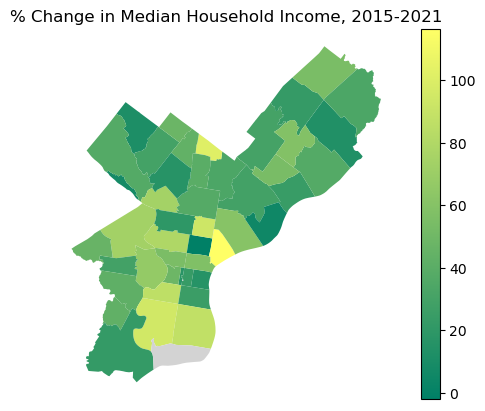

Median income data missing for 19109 and 19112


In [41]:
# Create zip code map
ax = zip_code_map_sorted.plot(column="% Change in Median Income 2015-2021", legend=True, missing_kwds={'color': 'lightgrey'},cmap="summer")
ax.set_axis_off()
ax.set_title("% Change in Median Household Income, 2015-2021")
plt.show()
print("Median income data missing for 19109 and 19112")

